# Web Mining and Applied NLP (44-620)

## Web Scraping and NLP with Requests, BeautifulSoup, and spaCy

### Student Name: Amber Speer
### GitHub Link: https://github.com/aspeer05/Mod-6


Perform the tasks described in the Markdown cells below.  When you have completed the assignment make sure your code cells have all been run (and have output beneath them) and ensure you have committed and pushed ALL of your changes to your assignment repository.

Every question that requires you to write code will have a code cell underneath it; you may either write your entire solution in that cell or write it in a python file (`.py`), then import and run the appropriate code to answer the question.

1. Write code that extracts the article html from https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/ and dumps it to a .pkl (or other appropriate file)

## Question 1

In [98]:
import requests

article_page = requests.get('https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/')
article_html = article_page.text

import pickle
with open('python-match.pkl', 'wb') as f:
    pickle.dump(article_page.text, f)
    
with open('python-match.pkl', 'rb') as f:
    article_htmal = pickle.load(f)

In [99]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(r.text, 'html5lib')

article_content = soup.find('article')
#Uncomment if you want to see the article text
#print(article_content)

2. Read in your article's html source from the file you created in question 1 and print it's text (use `.get_text()`)

## Question 2

In [100]:
print(article_content.get_text())


    
        How Laser Headlights Work
        
            
                130 Comments            
            
                by:
                Lewin Day
            
        

        
            March 22, 2021
            
                
                
            
        

        
    

    
        When we think about the onward march of automotive technology, headlights aren’t usually the first thing that come to mind. Engines, fuel efficiency, and the switch to electric power are all more front of mind. However, that doesn’t mean there aren’t thousands of engineers around the world working to improve the state of the art in automotive lighting day in, day out.
Sealed beam headlights gave way to more modern designs once regulations loosened up, while bulbs moved from simple halogens to xenon HIDs and, more recently, LEDs. Now, a new technology is on the scene, with lasers!

Laser Headlights?!
BWM’s prototype laser headlight assemblies undergoing testing.
The first i

3. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent tokens (converted to lower case).  Print the common tokens with an appropriate label.  Additionally, print the tokens their frequencies (with appropriate labels). Make sure to remove things we don't care about (punctuation, stopwords, whitespace).

## Question 3

In [101]:
import spacy
from spacytextblob.spacytextblob import SpacyTextBlob

nlp = spacy.load('en_core_web_md')
nlp.add_pipe('spacytextblob')
doc = nlp(article_content.get_text())
#print(f'Polarity: {doc._.polarity}')


In [102]:
from collections import Counter

def we_care_about(token):
    return not (token.is_space or token.is_punct or token.is_stop)

interesting_words = [token.lower_ for token in doc if we_care_about(token)]
word_freq = Counter(map(str,interesting_words))
print("Five most common words and their frequencies: ", word_freq.most_common(5))

Five most common words and their frequencies:  [('laser', 35), ('headlights', 19), ('headlight', 11), ('technology', 10), ('led', 10)]


4. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent lemmas (converted to lower case).  Print the common lemmas with an appropriate label.  Additionally, print the lemmas with their frequencies (with appropriate labels). Make sure to remove things we don't care about (punctuation, stopwords, whitespace).

## Question 4

In [103]:
nlp = spacy.load('en_core_web_md')
nlp.add_pipe('spacytextblob')
doc = nlp(article_content.get_text())

In [104]:
def we_care_about(token):
    return not (token.is_space or token.is_punct or token.is_stop)

interesting_lemmas = [token.lemma_.lower() for token in doc if we_care_about(token)]
lemma_freq = Counter(interesting_lemmas)
print("Five most common lemmas and their frequencies: ", lemma_freq.most_common(5))

Five most common lemmas and their frequencies:  [('laser', 40), ('headlight', 28), ('led', 16), ('beam', 12), ('light', 11)]


5. Define the following methods:
    * `score_sentence_by_token(sentence, interesting_token)` that takes a sentence and a list of interesting token and returns the number of times that any of the interesting words appear in the sentence divided by the number of words in the sentence
    * `score_sentence_by_lemma(sentence, interesting_lemmas)` that takes a sentence and a list of interesting lemmas and returns the number of times that any of the interesting lemmas appear in the sentence divided by the number of words in the sentence
    
You may find some of the code from the in class notes useful; feel free to use methods (rewrite them in this cell as well).  Test them by showing the score of the first sentence in your article using the frequent tokens and frequent lemmas identified in question 3.

## Question 5

In [105]:
cool_words = set()
for token, freq in word_freq.most_common(5):
    cool_words.add(token)
#print(cool_words)
    
cool_lemmas = set()
for lemma, freq in lemma_freq.most_common(5):
    cool_lemmas.add(lemma)
#print(cool_lemmas)

sentences = list(doc.sents)
print(sentences[1])

#sent_str = str(sentence).replace('\n','').replace('  ',' ')
#print(count,':', sent_str)


When we think about the onward march of automotive technology, headlights aren’t usually the first thing that come to mind.


In [106]:

class Score():
    def score_sentence_by_token(sentence, interesting_token):
        def sentence_length (sent):
            length = 0
            for token in sent:
                if not(token.is_space or token.is_punct):
                    length += 1
            return length
        sent_len = sentence_length(sentence)
        #print("Sentence Length: ")
        #print(sent_len)
        count = 0
        for token in sentence:
            if token.lemma_.lower() in interesting_token:
                count += 1
        if sent_len == 0: 
            token_score = 0
        else:
            token_score= count/sent_len
        
        #print(sentence)
        #print("Token Score: ")
        #print(token_score)
        return token_score
    
    def score_sentence_by_lemma(sentence, interesting_lemma):
        def sentence_length (sent):
            length = 0
            for token in sent:
                if not(token.is_space or token.is_punct):
                    length += 1
            return length
        sent_len = sentence_length(sentence)
        #print("Sentence Length: ")
        #print(sent_len)
        count = 0
        for token in sentence:
            if token.lemma_.lower() in interesting_lemma:
                count += 1
        if sent_len == 0: 
            lemma_score = 0
        else:
            lemma_score= count/sent_len
        #print(sentence)
        #print("Lemma Score: ")
        #print(lemma_score)
        return lemma_score

Score.score_sentence_by_token(sentences[0], cool_words)  
Score.score_sentence_by_lemma(sentences[0], cool_lemmas)

0.08333333333333333

6. Make a list containing the scores (using tokens) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores. From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

## Question 6

[0.16666666666666666, 0.09523809523809523, 0.0, 0.0, 0.07692307692307693, 0.2, 1.0, 0.25, 0.13043478260869565, 0.0, 0.14285714285714285, 0.25, 0.125, 0.045454545454545456, 0.2222222222222222, 0.045454545454545456, 0.1875, 0.15, 0.09090909090909091, 0.07692307692307693, 0.05263157894736842, 0.05, 0.045454545454545456, 0.09375, 0.047619047619047616, 0.0, 0.03333333333333333, 0.29411764705882354, 0.08333333333333333, 0.0, 0.14285714285714285, 0.15151515151515152, 0.10526315789473684, 0.05555555555555555, 0.12903225806451613, 0.0, 0.0, 0.0, 0.0, 0.07142857142857142, 0.07142857142857142, 0.0, 0.0, 0.04, 0.1111111111111111, 0.125, 0.07317073170731707, 0.03225806451612903, 0.08333333333333333, 0.1111111111111111, 0.04, 0.12, 0.06060606060606061, 0.08695652173913043, 0.07407407407407407, 0.0, 0.045454545454545456, 0, 0.4]


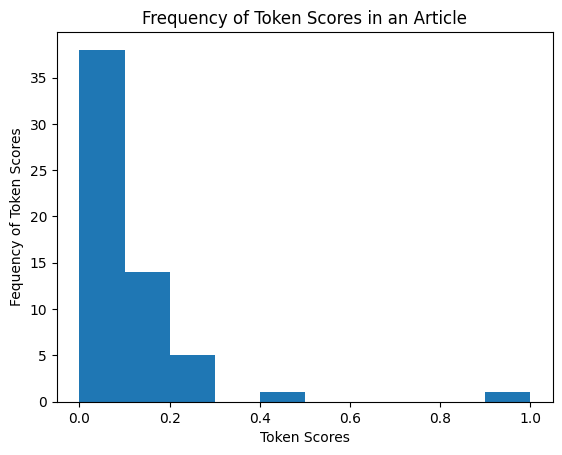

In [107]:
import matplotlib.pyplot as plt
token_scores = list()
for i in range(len(sentences)):
    
    token_scores.append(Score.score_sentence_by_token(sentences[i], cool_words))

print(token_scores)

plt.hist(token_scores)

plt.title("Frequency of Token Scores in an Article")
plt.xlabel("Token Scores")
plt.ylabel("Fequency of Token Scores")
plt.show()

# 0.0-0.1 seems to be the most common range of scores by far in this histogram

7. Make a list containing the scores (using lemmas) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores.  From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

## Question 7

[0.08333333333333333, 0.047619047619047616, 0.0, 0.0, 0.11538461538461539, 0.1, 0.5, 0.25, 0.17391304347826086, 0.09523809523809523, 0.14285714285714285, 0.25, 0.125, 0.09090909090909091, 0.2222222222222222, 0.09090909090909091, 0.125, 0.1, 0.09090909090909091, 0.15384615384615385, 0.10526315789473684, 0.1, 0.0, 0.09375, 0.047619047619047616, 0.0, 0.03333333333333333, 0.29411764705882354, 0.08333333333333333, 0.0, 0.14285714285714285, 0.21212121212121213, 0.10526315789473684, 0.05555555555555555, 0.12903225806451613, 0.0, 0.0, 0.0, 0.0, 0.07142857142857142, 0.14285714285714285, 0.05714285714285714, 0.0, 0.04, 0.1111111111111111, 0.125, 0.14634146341463414, 0.06451612903225806, 0.0, 0.1111111111111111, 0.0, 0.12, 0.030303030303030304, 0.13043478260869565, 0.037037037037037035, 0.041666666666666664, 0.045454545454545456, 0, 0.4666666666666667]


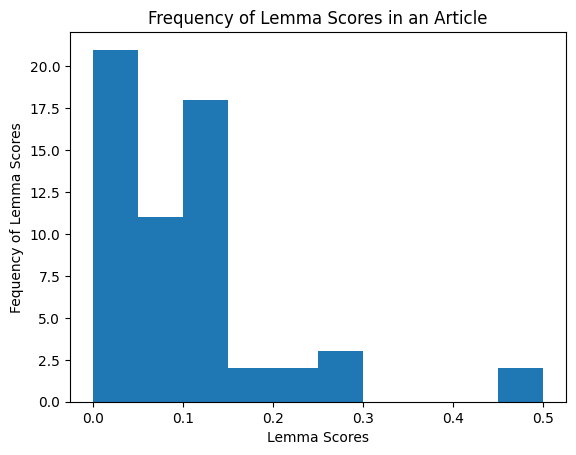

In [108]:
lemma_scores = list()
for i in range(len(sentences)):
    
    lemma_scores.append(Score.score_sentence_by_lemma(sentences[i], cool_lemmas))

print(lemma_scores)

plt.hist(lemma_scores)

plt.title("Frequency of Lemma Scores in an Article")
plt.xlabel("Lemma Scores")
plt.ylabel("Fequency of Lemma Scores")
plt.show()

# 0.0-0.05 seems to be the most common range of scores in this histogram

8. Which tokens and lexems would be ommitted from the lists generated in questions 3 and 4 if we only wanted to consider nouns as interesting words?  How might we change the code to only consider nouns? Put your answer in this Markdown cell (you can edit it by double clicking it).

## Question 8

If only nouns were considered interesting word none of the top five interesting tokens or lemma SHOULD be ommitted from the list.  However, if LED is confused with the verb led, that might take it off the list by mistake.  But as it is, the verb led is lumped in with LED which might give it a higher frequency than is accurate.  Some of the words (light, beam, and laser) can potentially be used as verbs as well.  If they are correctly identified in this manner and the verbs are ommitted, the list of interesting tokens/lemma might change a bit.

We could change the code to consider only nouns by setting the Part of Speech attribute to noun. 
 pos_tag = ['NOUN']
 if token.pos_ in pos_tag:
     ....Whatever code you need next

In [109]:
print(cool_words)
print(cool_lemmas)

{'headlight', 'technology', 'headlights', 'laser', 'led'}
{'headlight', 'light', 'beam', 'laser', 'led'}
